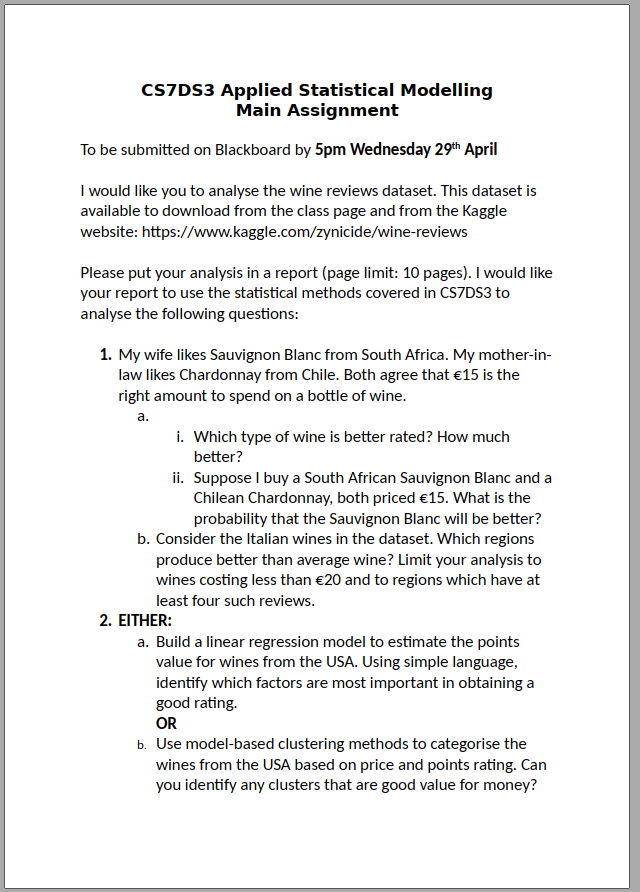

In [32]:
library(jsonlite)
library(ggplot2)
#library(MCMCpack)
library(RColorBrewer)
library(dplyr)
#library(LabelEncoder)
library(plyr)

In [33]:
df <- read.csv("winemag-data-130k-v2.csv")

In [34]:
df <- df[c('country','points','price','region_1','variety')]

In [35]:
head(df,10)

country,points,price,region_1,variety
Italy,87,NA,Etna,White Blend
Portugal,87,15,,Portuguese Red
US,87,14,Willamette Valley,Pinot Gris
US,87,13,Lake Michigan Shore,Riesling
US,87,65,Willamette Valley,Pinot Noir
Spain,87,15,Navarra,Tempranillo-Merlot
Italy,87,16,Vittoria,Frappato
France,87,24,Alsace,GewÃ¼rztraminer
Germany,87,12,,GewÃ¼rztraminer
France,87,27,Alsace,Pinot Gris


In [36]:
df_test <- filter(df,df$variety == "Sauvignon Blanc" & df$country == "South Africa" | 
              df$variety == "Chardonnay" & df$country == "Chile")

In [37]:
head(df_test,10)

country,points,price,region_1,variety
Chile,87,18,,Chardonnay
Chile,87,11,,Chardonnay
Chile,86,18,,Chardonnay
Chile,80,19,,Chardonnay
Chile,88,14,,Chardonnay
Chile,87,11,,Chardonnay
Chile,85,14,,Chardonnay
South Africa,91,50,,Sauvignon Blanc
Chile,85,10,,Chardonnay
Chile,84,18,,Chardonnay


In [38]:
df_new <- filter(df_test,df_test$price == 15)

In [39]:
head(df_new,10)

country,points,price,region_1,variety
Chile,85,15,,Chardonnay
Chile,83,15,,Chardonnay
Chile,80,15,,Chardonnay
Chile,82,15,,Chardonnay
South Africa,89,15,,Sauvignon Blanc
South Africa,85,15,,Sauvignon Blanc
Chile,85,15,,Chardonnay
South Africa,90,15,,Sauvignon Blanc
Chile,83,15,,Chardonnay
Chile,85,15,,Chardonnay


In [40]:
data_1 = df_new[c("country","points","variety")]

In [41]:
# To treat variety as a index column, not as a measurement we have changed the class of this object to be a factor

In [42]:
data_1$variety <- factor(data_1$variety)

In [43]:
summary(data_1)

         country       points                 variety  
 Chile       :37   Min.   :80.00   Chardonnay     :37  
 South Africa:14   1st Qu.:85.00   Sauvignon Blanc:14  
             : 0   Median :86.00                       
 Argentina   : 0   Mean   :85.67                       
 Armenia     : 0   3rd Qu.:87.00                       
 Australia   : 0   Max.   :90.00                       
 (Other)     : 0                                       

In [44]:
sum(is.na(data_1))

[1] 0

In [45]:
head(data_1,5)

country,points,variety
Chile,85,Chardonnay
Chile,83,Chardonnay
Chile,80,Chardonnay
Chile,82,Chardonnay
South Africa,89,Sauvignon Blanc


# Q1.a.i

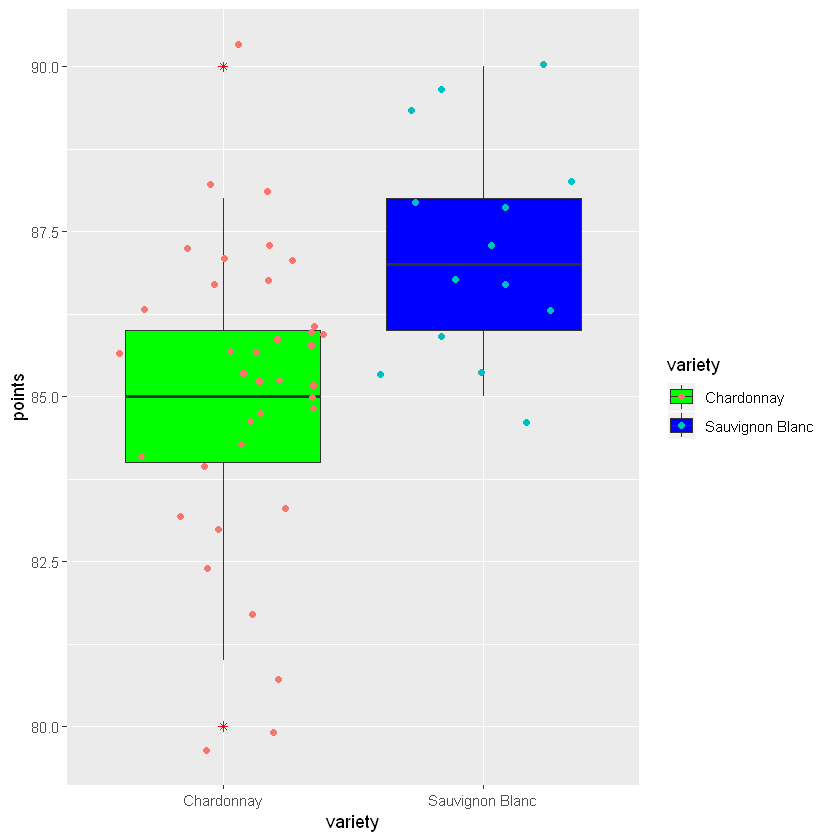

In [46]:
p <- ggplot(data_1,aes(variety, points,fill=variety)) + geom_boxplot(outlier.colour = 'red',outlier.shape = 8)
p + scale_fill_manual(breaks = c("Chardonnay", "Sauvignon Blanc"),values=c("green", "blue")) + geom_jitter(aes(variety, points, colour = variety))

In [47]:
tapply(data_1$points,data_1$variety,mean)

Chardonnay Sauvignon Blanc 
       85.08108        87.21429

In [48]:
# From above output we assume that the average rating of Sauvignon Blanc is better than Chardonnay wine

In [49]:
tapply(data_1$points,data_1$variety,median)

Chardonnay Sauvignon Blanc 
             85              87

In [50]:
tapply(data_1$points,data_1$variety,sd)

Chardonnay Sauvignon Blanc 
       2.203260        1.717716

In [51]:
t.test(points ~ variety, data=data_1, var.equal = TRUE)


	Two Sample t-test

data:  points by variety
t = -3.2599, df = 49, p-value = 0.00203
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.4482245 -0.8181847
sample estimates:
     mean in group Chardonnay mean in group Sauvignon Blanc 
                     85.08108                      87.21429 


In [52]:
# The 95% confidence interval is providing a range that you are 95% confident the true difference in means of Chardonnay wine 
# rating and Sauvignon Blanc wine rating is between 0.8181847 and 3.4482245

In [53]:
# The test statistic signifies that the average rating of both wine (Chardona and savoru blanc) are different(signifcant)
# As p < 0.05 and t statitistic > critical value,it means we can reject null hypothesis --> alternative hypothesis is true
# Or means of two samples are significant(different)

In [54]:
#selecting the variety of wine based on country
SB_wine <- data_1 %>% filter(country == "South Africa", variety == "Sauvignon Blanc")

CH_wine <- data_1 %>% filter(country == "Chile",  variety == "Chardonnay")

In [55]:
mean(SB_wine$points>CH_wine$points)

Warning message in SB_wine$points > CH_wine$points:
"longer object length is not a multiple of shorter object length"

[1] 0.7297297

In [56]:
mean_diff <- mean(SB_wine$points) - mean(CH_wine$points)

In [57]:
mean_diff

[1] 2.133205

In [58]:
wine_rating_quality = ((mean(SB_wine$points) - mean(CH_wine$points))/mean(CH_wine$points))*100

In [59]:
wine_rating_quality

[1] 2.507261

In [60]:
sum(is.na(data_1))

[1] 0

In [61]:
head(data_1,4)

country,points,variety
Chile,85,Chardonnay
Chile,83,Chardonnay
Chile,80,Chardonnay
Chile,82,Chardonnay


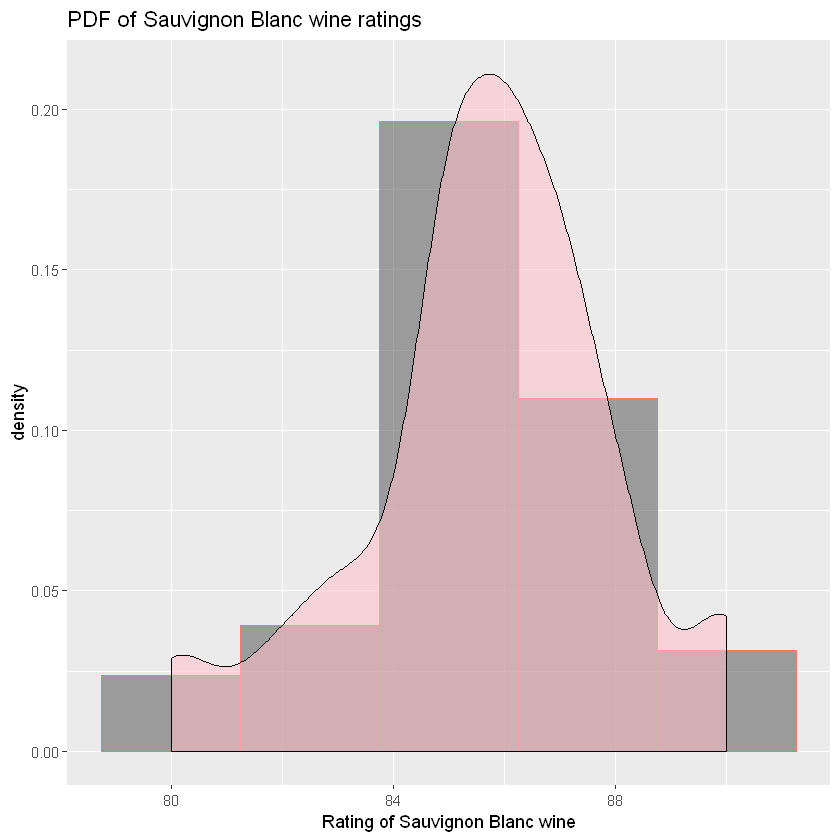

In [62]:
## set up ggplot for histogram and density plots
p2 <- ggplot(data_1, aes(data_1$points, ..density..))
## add histogram
p2 <- p2 + geom_histogram(bins = 5, aes(alpha = 0.5, colour = "blue"), show.legend = FALSE)
p2 <- p2 + geom_density(fill = "pink", aes(alpha = 0.5), show.legend = FALSE)
p2 <- p2 + xlab("Rating of Sauvignon Blanc wine") + ylab("density") + ggtitle("PDF of Sauvignon Blanc wine ratings")
p2

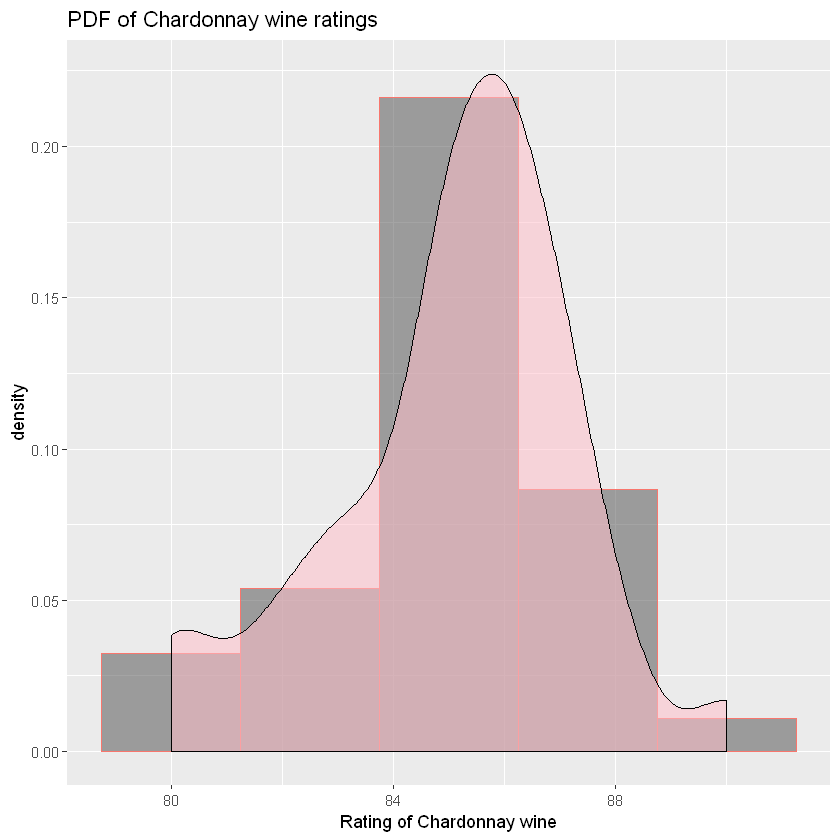

In [63]:
## set up ggplot for histogram and density plots
p2 <- ggplot(CH_wine, aes(CH_wine$points, ..density..))
## add histogram
p2 <- p2 + geom_histogram(bins = 5, aes(alpha = 0.5, colour = "blue"), show.legend = FALSE)
p2 <- p2 + geom_density(fill = "pink", aes(alpha = 0.5), show.legend = FALSE)
p2 <- p2 + xlab("Rating of Chardonnay wine") + ylab("density") + ggtitle("PDF of Chardonnay wine ratings")
p2

# Comparing the means in a Bayesian mode

# Gibbs Sampling

In [64]:
# compare_gibbs <- function(y, ind, mu0 = 85, tau0 = 1/25, del0 = 0, gamma0 = 1/25,
# a0 = 289, b0 = 3.4, maxiter = 5000)
compare_gibbs <- function(y, ind, mu0 = 85, tau0 = 1/100, del0=0, gamma0=1/100, a0 = 50, b0 = 1 , maxiter = 5000)
{
y1 <- y[ind == 1]
y2 <- y[ind == 2]
n1 <- length(y1)
n2 <- length(y2)
##### starting values
mu <- (mean(y1) + mean(y2)) / 2
del <- (mean(y1) - mean(y2)) / 2
mat_store <- matrix(0, nrow = maxiter, ncol = 3)
#####
##### Gibbs sampler
an <- a0 + (n1 + n2)/2
for(s in 1 : maxiter)
{
##update tau
bn <- b0 + 0.5 * (sum((y1 - mu - del) ^ 2) + sum((y2 - mu + del) ^ 2))
tau <- rgamma(1, an, bn)
##
##update mu
taun <- tau0 + tau * (n1 + n2)
mun <- (tau0 * mu0 + tau * (sum(y1 - del) + sum(y2 + del))) / taun
mu <- rnorm(1, mun, sqrt(1/taun))
##
##update del
gamman <- tau0 + tau*(n1 + n2)
deln <- ( del0 * tau0 + tau * (sum(y1 - mu) - sum(y2 - mu))) / gamman
del<-rnorm(1, deln, sqrt(1/gamman))
##
## store parameter values
mat_store[s, ] <- c(mu, del, tau)
}
colnames(mat_store) <- c("mu", "del", "tau")
return(mat_store)
}

In [65]:
#install.packages('MCMCpack')

In [66]:
library('MCMCpack')

Warning message:
"package 'MCMCpack' was built under R version 3.6.3"Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.6.3"Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2020 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##


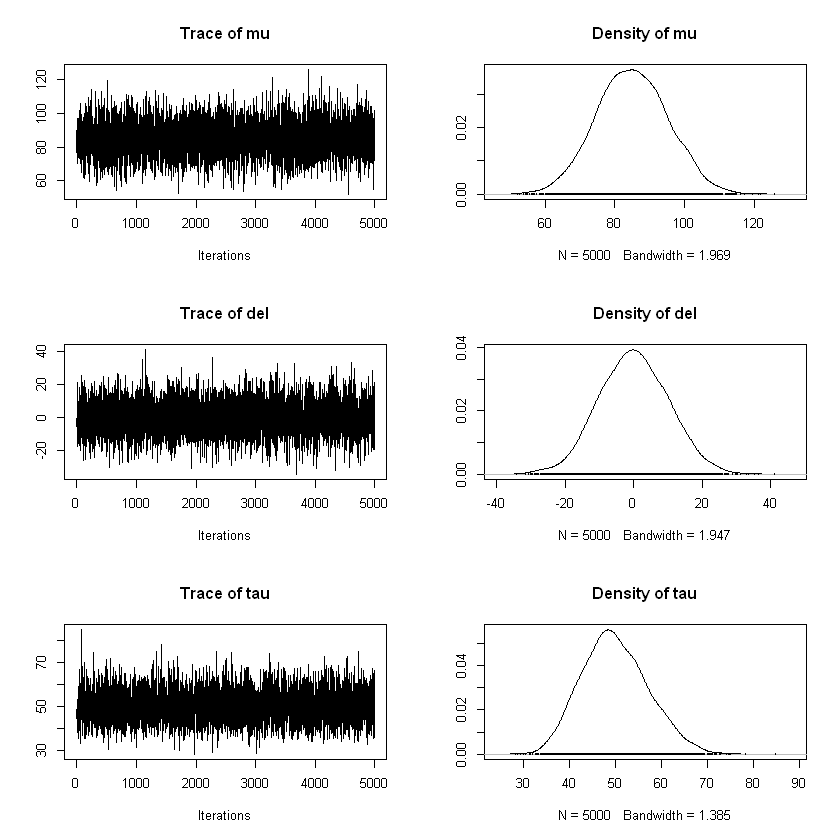

In [67]:
fit <- compare_gibbs(data_1$points, as.factor(data_1$variety))
plot(as.mcmc(fit))

In [68]:
raftery.diag(as.mcmc(fit))


Quantile (q) = 0.025
Accuracy (r) = +/- 0.005
Probability (s) = 0.95 
                                           
     Burn-in  Total Lower bound  Dependence
     (M)      (N)   (Nmin)       factor (I)
 mu  2        3866  3746         1.030     
 del 2        3803  3746         1.020     
 tau 2        3620  3746         0.966     


In [69]:
head(fit,10)

mu,del,tau
89.60607,-0.4108375,44.76248
87.43389,-1.3944285,46.24862
83.13273,-5.0409335,46.57912
70.08787,-0.9556970,51.05931
73.56190,3.7108767,50.26748
77.86755,8.7074379,53.36589
87.39975,-15.0171617,44.62669
80.61923,1.3375899,42.47192
73.01267,-2.5956040,43.84867
95.16953,-8.3310094,41.80381


In [70]:
# Lower values of dependence factor(Close to zero) explains that performance of the sampler is satisfactory.

In [72]:
#We can use summary statistics as below to understand paramters of the posterior distribution

In [73]:
apply(fit, 2, mean)

mu         del         tau 
85.01118578  0.08390712 49.92288138

In [74]:
apply(fit, 2, sd)

mu       del       tau 
10.204710 10.087959  7.177317

In [75]:
# to interperate tau we convert it to sd
mean(1/sqrt(fit[, 3])) 
sd(1/sqrt(fit[, 3]))

[1] 0.142635

[1] 0.01033108

In [76]:
apply(fit, 2, function(x) quantile(x, c(0.05, 0.95)))

,mu,del,tau
5%,68.38158,-16.10909,38.94527
95%,101.86057,16.63668,62.36311


In [77]:
y1_sim <- rnorm(5000, fit[, 1] + fit[, 2], sd = 1/sqrt(fit[, 3]))
y2_sim <- rnorm(5000, fit[, 1] - fit[, 2], sd = 1/sqrt(fit[, 3]))

In [78]:
fit.mcmc <- as.mcmc(y1_sim) 

In [79]:
fit.mcmc

Markov Chain Monte Carlo (MCMC) output:
Start = 1 
End = 5000 
Thinning interval = 1 
   [1]  89.02899  86.09380  78.15977  69.11576  77.20938  86.32266  72.18034
   [8]  81.77437  70.29827  86.97634  97.19879 105.78009  90.04979  99.02805
  [15]  70.16599  82.73999  83.66494  96.88896  73.03956  74.33305  79.60689
  [22]  79.41829  89.13956  75.98000  77.41548  88.98371  88.52433  82.92774
  [29]  73.25394  95.50023  71.52200  80.08464  90.23515  76.23930  91.30506
  [36]  69.65356  82.56793  82.43899  79.89756  88.66358  90.88934  85.64275
  [43]  87.51968  72.11224  88.07277  89.04970 102.39948  78.16781  83.00879
  [50] 114.74432 109.43162  71.69266  75.71492  96.57864  97.26893  92.09857
  [57]  90.43308  85.67246  89.77070 102.18975  68.95791  92.56144  74.86596
  [64]  86.53949  86.16526  82.84085  98.10880  79.43978  65.84538  71.15139
  [71] 101.05826  84.40096  68.02455  62.58245  80.39592  96.10997  91.32198
  [78]  78.48557  68.43566  78.38253  87.35882  80.24531  67.32882 

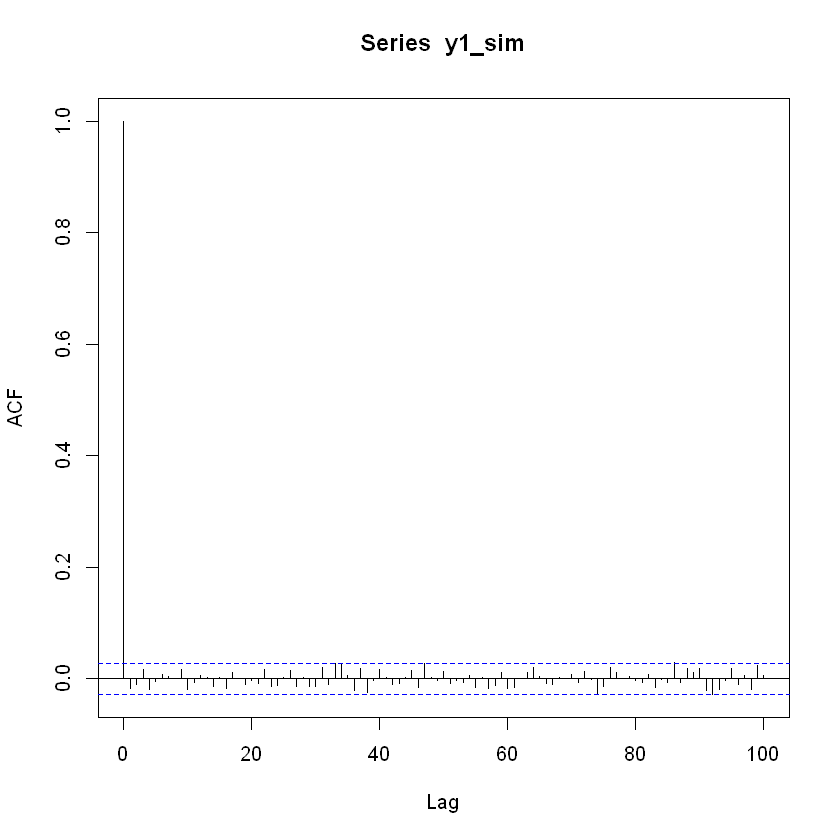

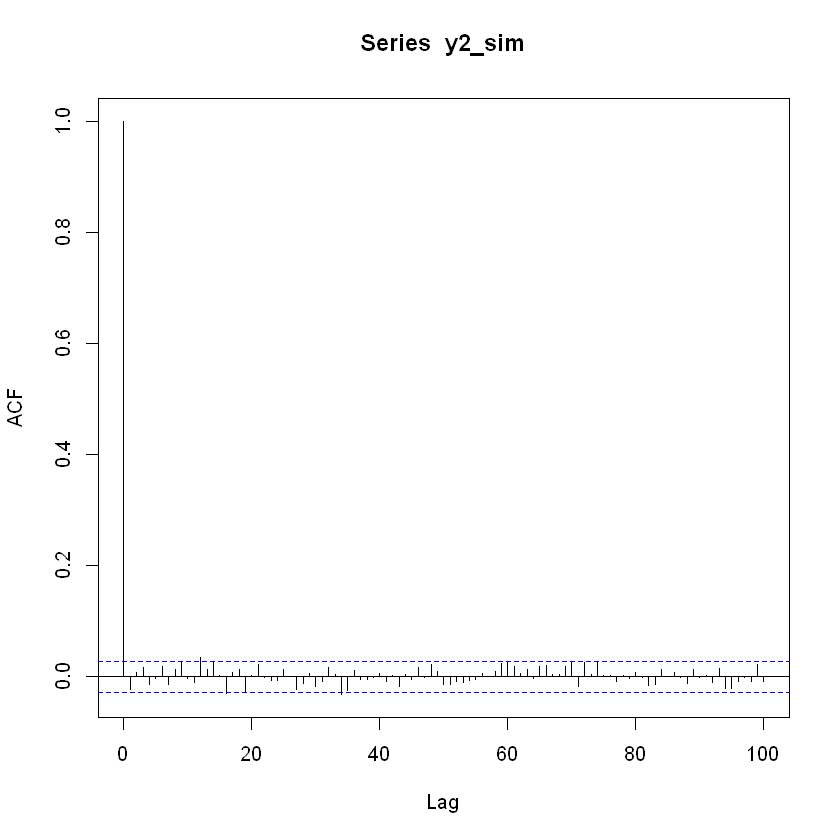

In [80]:
acf(y1_sim,lag.max = 100)
acf(y2_sim,lag.max = 100)

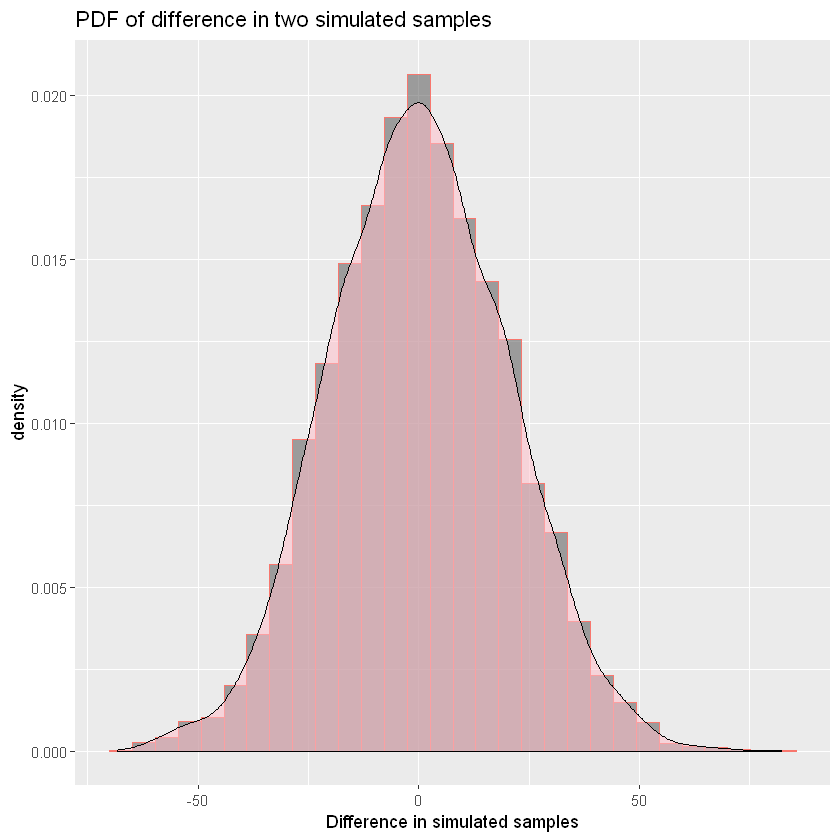

In [81]:
## set up ggplot for histogram and density plots
p2 <- ggplot(data.frame(y_sim_diff = y1_sim-y2_sim),aes(y1_sim-y2_sim, ..density..))

## add histogram
p2 <- p2 + geom_histogram(bins = 30, aes(y_sim_diff,alpha = 0.5, colour = "blue"), show.legend = FALSE)
p2 <- p2 + geom_density(fill = "pink", aes(y_sim_diff,alpha = 0.5), show.legend = FALSE)
p2 <- p2 + xlab("Difference in simulated samples") + ylab("density") + ggtitle("PDF of difference in two simulated samples")
p2

In [83]:
#install.packages('LaplacesDemon')

In [84]:
library(LaplacesDemon)

Warning message:
"package 'LaplacesDemon' was built under R version 3.6.3"
Attaching package: 'LaplacesDemon'

The following objects are masked from 'package:MCMCpack':

    BayesFactor, ddirichlet, dinvgamma, rdirichlet, rinvgamma



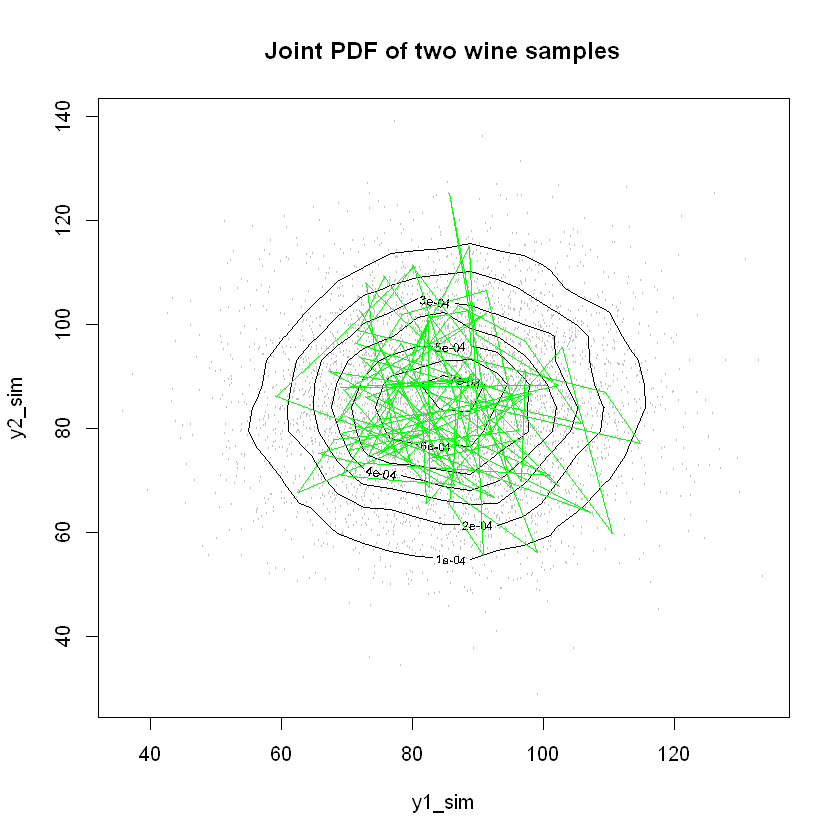

In [85]:
joint.density.plot(y1_sim, y2_sim, Title='Joint PDF of two wine samples' , contour=TRUE, color=FALSE, Trace=c(1,100))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


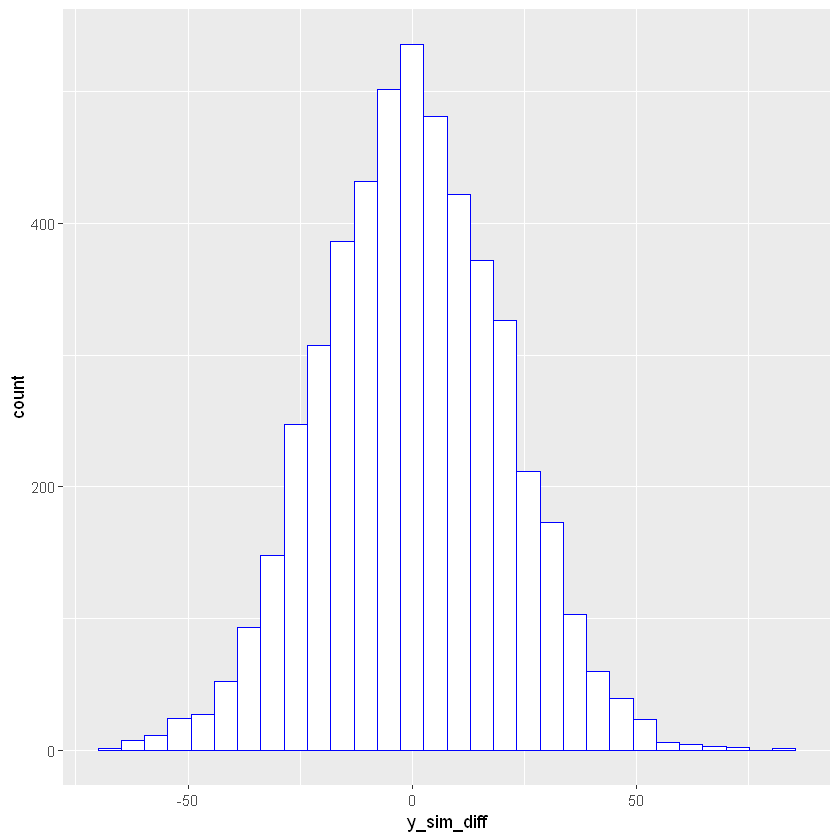

In [86]:
ggplot(data.frame(y_sim_diff = y1_sim - y2_sim), aes(x=y_sim_diff)) + stat_bin(aes(y_sim_diff)) +geom_histogram(color="blue", fill="white")

In [87]:
mean(y1_sim > y2_sim)

[1] 0.5

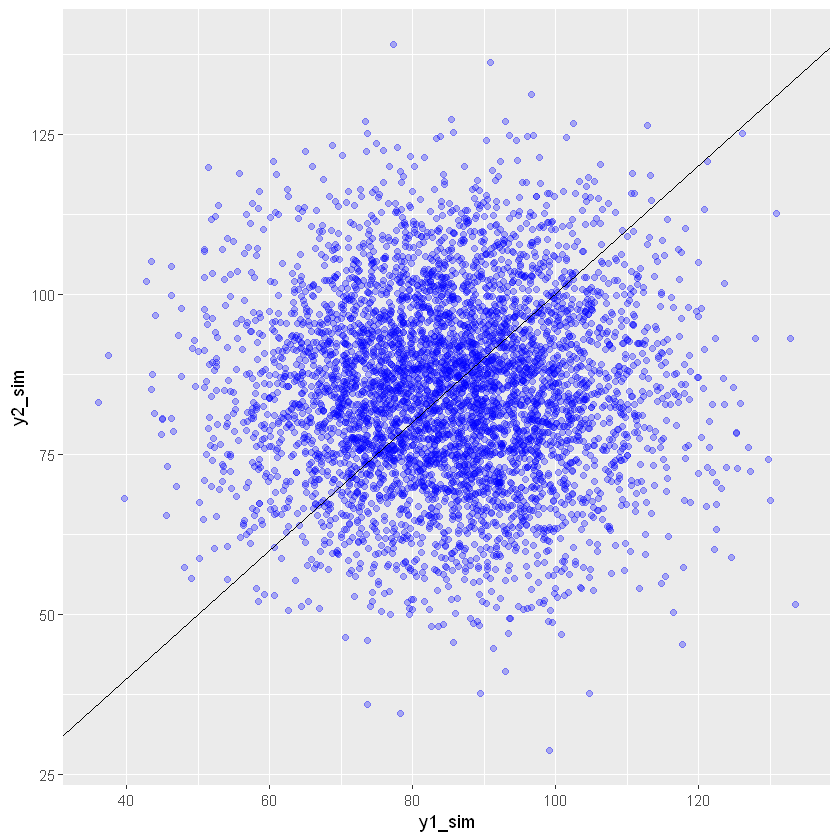

In [92]:
ggplot(data.frame(y1_sim, y2_sim)) + geom_point(color='blue',fill="white",aes(y1_sim, y2_sim), alpha = 0.3) + geom_abline(slope = 1, intercept = 0) 

# The probability that Sauvignon Blanc is better than Chardonnay wine is 0.729

In [93]:
# The Probability that wine Chardonnay from Chile is better than Sauvignon Blanc from South Africa is 0.73
# Although the average points given by cutomers were higher for Sauvignon Blanc as seen from the box plot but after modeling
# difference in mean for two samples simulated from Gibbs sampling, it is clear that wine from Chardonnay from Chile is better
# than Sauvignon Blanc from South Africa
# Also the count of reviews for wine Chardonnay from Chile is 37 whereas the count of reviews for wine Sauvignon Blanc from
# South Africa is 14

# Q1.a.ii Second part 

In [94]:
df_test_2 <- filter(df,df$country == "Italy")

In [95]:
df_test_3 <- filter(df_test_2,df_test_2$price < 20)

In [96]:
head(df_test_3,10)

country,points,price,region_1,variety
Italy,87,16,Vittoria,Frappato
Italy,87,19,Sicilia,White Blend
Italy,87,13,Terre Siciliane,White Blend
Italy,87,10,Terre Siciliane,Nero d'Avola
Italy,87,17,Cerasuolo di Vittoria,Red Blend
Italy,86,11,Puglia,Primitivo
Italy,86,12,Sicilia,Nero d'Avola
Italy,86,17,Sicilia,Catarratto
Italy,86,13,Sicilia,Inzolia
Italy,85,14,Monica di Sardegna,Monica


In [97]:
df_test_4 = ddply(df_test_3, "region_1", function(d) {if(nrow(d)>3) d else NULL})

In [98]:
head(df_test_4,20)

country,points,price,region_1,variety
Italy,87,14,,Lambrusco
Italy,88,18,,Glera
Italy,88,19,,Glera
Italy,88,18,,Glera
Italy,86,18,,Arneis
Italy,89,16,,Red Blend
Italy,87,14,,Lambrusco
Italy,88,16,,Erbaluce
Italy,87,11,Aglianico del Vulture,Aglianico
Italy,87,13,Aglianico del Vulture,Aglianico


In [99]:
df_test_4[df_test_4 == ""] <- NA

In [100]:
head(df_test_4,10)

country,points,price,region_1,variety
Italy,87,14,NA,Lambrusco
Italy,88,18,NA,Glera
Italy,88,19,NA,Glera
Italy,88,18,NA,Glera
Italy,86,18,NA,Arneis
Italy,89,16,NA,Red Blend
Italy,87,14,NA,Lambrusco
Italy,88,16,NA,Erbaluce
Italy,87,11,Aglianico del Vulture,Aglianico
Italy,87,13,Aglianico del Vulture,Aglianico


In [101]:
nrow(df_test_4)

[1] 4702

In [102]:
summary(df_test_4)

      country         points          price      
 Italy    :4702   Min.   :80.00   Min.   : 5.00  
          :   0   1st Qu.:86.00   1st Qu.:13.00  
 Argentina:   0   Median :87.00   Median :15.00  
 Armenia  :   0   Mean   :86.59   Mean   :15.02  
 Australia:   0   3rd Qu.:88.00   3rd Qu.:17.00  
 Austria  :   0   Max.   :93.00   Max.   :19.00  
 (Other)  :   0                                  
                                        region_1            variety    
 Sicilia                                    : 418   Red Blend   : 821  
 Toscana                                    : 230   Glera       : 351  
 Chianti Classico                           : 182   Pinot Grigio: 346  
 Alto Adige                                 : 165   Sangiovese  : 310  
 Conegliano Valdobbiadene Prosecco Superiore: 126   White Blend : 250  
 (Other)                                    :3573   Nero d'Avola: 180  
 NA's                                       :   8   (Other)     :2444  

In [103]:
sum(is.na(df_test_4$region_1))

[1] 8

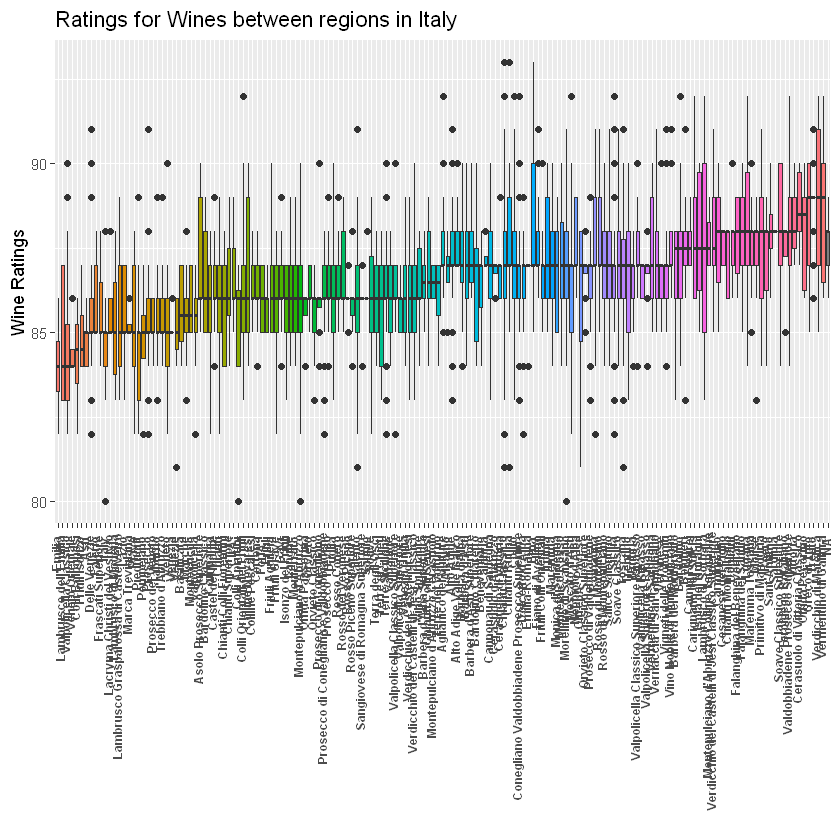

In [104]:
ggplot(df_test_4) + geom_boxplot(aes(x = reorder(region_1, points, median), points,
fill = reorder(region_1, points, median)), show.legend=FALSE) + labs(title = "Ratings for Wines between regions in Italy",
x = "", y = "Wine Ratings") + theme_gray() + theme(axis.text.x = element_text(size = 7,angle = 90, face = "bold", vjust = 0.2, hjust = 0.98))

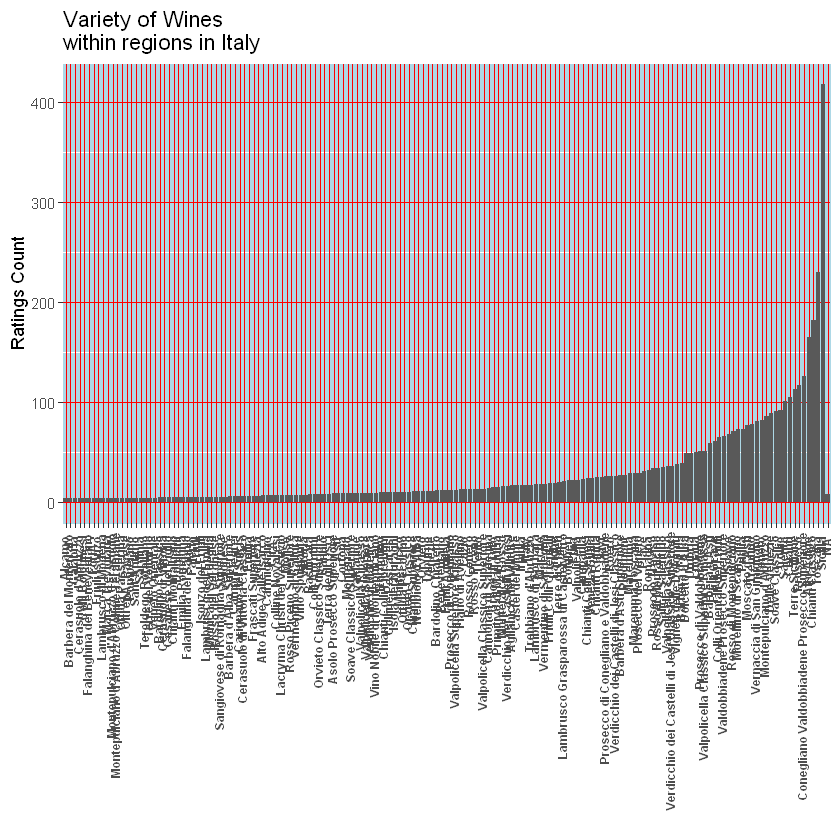

In [105]:
#plotting the number of ratings for wines in the regions within Italy
df_test_4 %>% ggplot(aes(x = reorder(region_1, region_1, length)),color='yellow') + stat_count() + labs(title = "Variety of Wines
within regions in Italy",x = "", y = "Ratings Count") +theme_gray() + theme(panel.background = element_rect(fill = "lightblue",
colour = "lightblue",size = 0.5, linetype = "solid"),panel.grid.major = element_line(size = 0.5, linetype = 'solid',
colour = "red"), panel.grid.minor = element_line(size = 0.25, linetype = 'solid',colour = "white"), axis.text.x = element_text(size = 7,angle = 90, face = "bold", vjust = 0.2, hjust = 0.98))

In [106]:
# In above plot we can see that there is not much sample size(count of reviews) for many wines. However there are some wines for which
# there are plent of reviews given

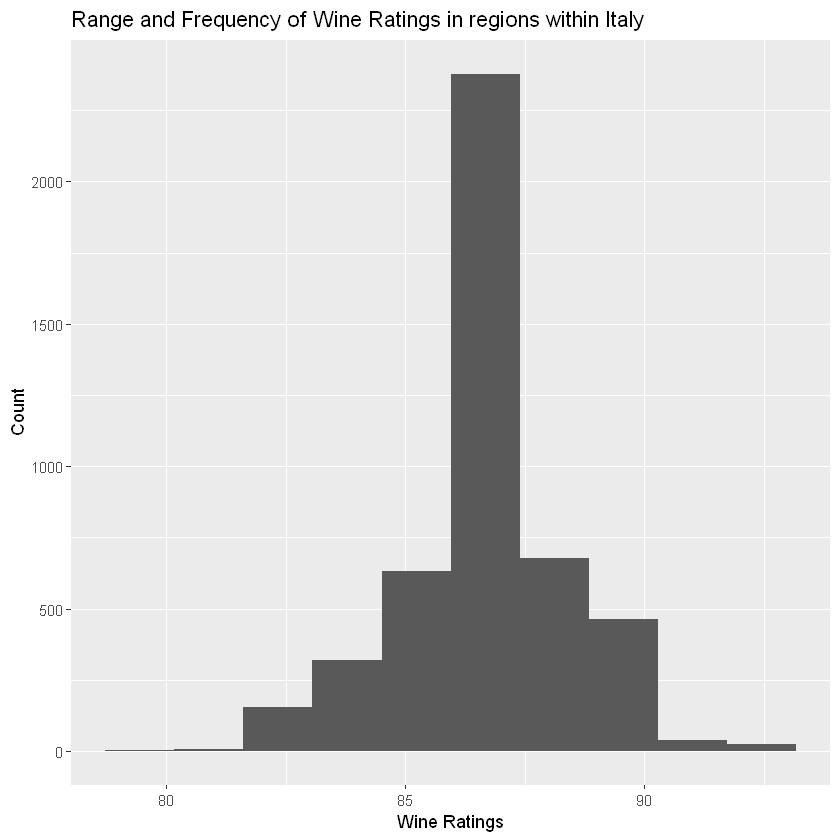

In [107]:
#plotting the range and frequency of wine ratings in regions within Italy
df_test_4 %>% ggplot(aes(points),colour = 'red') + stat_bin(bins = 10) + 
labs(title = "Range and Frequency of Wine Ratings in regions within Italy", x = "Wine Ratings",y = "Count")

In [108]:
# Above plot shows the count of rating given by cutomers are maximumu between 83-89 i.e. more than 2000
# Very few people have given rating between 75 - 83 or between 89-95

Warning message:
"Removed 1068 rows containing missing values (geom_point)."

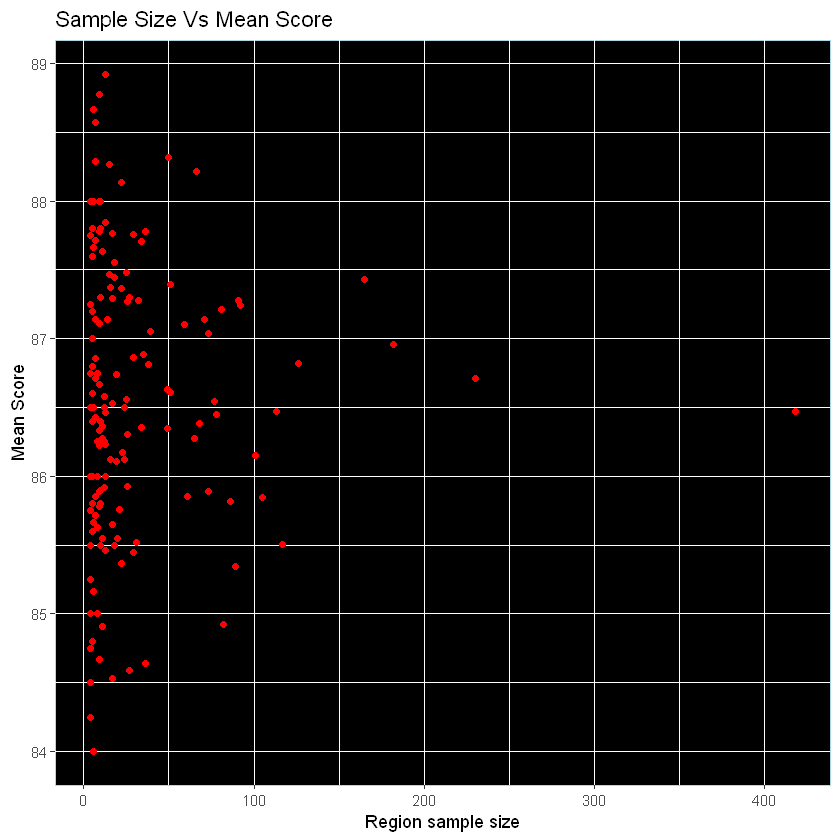

In [144]:
ggplot(data.frame(size = tapply(df_test_4$points, df_test_4$region_1, length),
                  mean_score = tapply(df_test_4$points, df_test_4$region_1, mean)), 
aes(size, mean_score)) + geom_point(colour='red') + xlab("Region sample size") + ylab("Mean Score") + 
ggtitle("Sample Size Vs Mean Score") + theme(panel.background = element_rect(fill = "black", colour = "lightblue",size = 0.5, linetype = "solid"))

In [110]:
gibbs_m_categories <- function(y, 
                               categories, 
                               mu_0 = 85, 
                               tau_0 = 1/100, 
                               a_0 = 1, 
                               b_0 = 50, 
                               alpha_0 =1, 
                               beta_0 = 50, 
                               max_iterations = 5000)
    
#     mu0 = 85, tau0 = 1/25, del0 = 0, gamma0 = 1/25,
# a0 = 289, b0 = 3.4, maxiter = 5000
{
  a_0 <- 289
  b_0 <- 3.4
  alpha_0 <-289
  beta_0 <- 3.4
  mu_0 <- 85
  tau_0 <- 1/25
  
  m <- nlevels(categories)
  ybar <- theta <- tapply(y, categories, mean)
  tau_w <- mean(1 / tapply(y, categories, var))
  
  mu <- mean(theta)
  tau_b <-var(theta)
  
  n_m <- tapply(y, categories, length)
  alpha_n <- alpha_0 + sum(n_m)/2
  
  theta_matrix <- matrix(0, nrow = max_iterations, ncol = m)
  matrix_store <- matrix(0, nrow = max_iterations, ncol = 3)
  
  for(iter in 1:max_iterations) 
  {
    for(j in 1:m) 
    {
      tau_n <- n_m[j] * tau_w + tau_b
      theta_n <- (ybar[j] * n_m[j] * tau_w + mu * tau_b) / tau_n
      theta[j] <- rnorm(1, theta_n, 1/sqrt(tau_n))
    }
    
    ss <- 0
    for(j in 1:m){
      ss <- ss + sum((y[categories == j] - theta[j])^2)
    }
    
    beta_n <- beta_0 + ss/2
    tau_w <- rgamma(1, alpha_n, beta_n)
    
    tau_m <- m * tau_b + tau_0
    mu_m <- (mean(theta) * m * tau_b + mu_0 * tau_0) / tau_m
    mu <- rnorm(1, mu_m, 1/sqrt(tau_m)) 

    a_m <- a_0 + m/2
    b_m <- b_0 + sum((theta - mu)^2) / 2
    tau_b <- rgamma(1, a_m, b_m)
    
    theta_matrix[iter,] <- theta
    matrix_store[iter, ] <- c(mu, tau_w, tau_b)
  }
  colnames(matrix_store) <- c("mean", "precision(w)", "precision(b)")
  colnames(theta_matrix) <- levels(categories)
  return(list(params = matrix_store, theta = theta_matrix))
}

In [111]:
sum(is.na(df_test_4$region_1))

[1] 8

In [112]:
df_test_5 <- na.omit(df_test_4)

In [113]:
head(df_test_5,5)

,country,points,price,region_1,variety
9,Italy,87,11,Aglianico del Vulture,Aglianico
10,Italy,87,13,Aglianico del Vulture,Aglianico
11,Italy,87,18,Aglianico del Vulture,Aglianico
12,Italy,87,11,Aglianico del Vulture,Aglianico
13,Italy,88,18,Aglianico del Vulture,Aglianico


In [114]:
sum(is.na(df_test_5))

[1] 0

In [115]:
df_test_5$region_1 <- as.character(df_test_5$region_1)
df_test_5 <- df_test_5[order(df_test_5$region_1), ]
df_test_5$region_1 <- as.factor(df_test_5$region_1)

In [116]:
df_test_5$points <- df_test_5$points + rnorm(nrow(df_test_5), 1, 1)/1000

In [117]:
tail(df_test_5,10)

,country,points,price,region_1,variety
4693,Italy,88.00286,19,Vino Spumante,Fiano
4694,Italy,86.00211,11,Vino Spumante,Grillo
4695,Italy,88.00054,19,Vino Spumante,Fiano
4696,Italy,87.00036,16,Vittoria,Frappato
4697,Italy,88.00153,18,Vittoria,Frappato
4698,Italy,88.00209,16,Vittoria,Frappato
4699,Italy,88.00037,14,Vittoria,Frappato
4700,Italy,87.00129,15,Vittoria,Insolia
4701,Italy,90.00036,16,Vittoria,Frappato
4702,Italy,90.00066,18,Vittoria,Nero d'Avola


In [118]:
fit2 <- gibbs_m_categories(df_test_5$points, df_test_5$region_1)

In [119]:
fit2

mean,precision(w),precision(b)
86.56889,782.8752,3.923368
86.59676,770.2530,4.162586
86.59764,747.3288,4.704992
86.51812,759.2005,4.190120
86.56665,770.0839,5.052212
86.53431,806.3231,4.219869
86.64130,783.8884,4.534742
86.56336,783.3293,4.803870
86.55073,789.1317,4.295802
86.54443,755.1949,4.889091


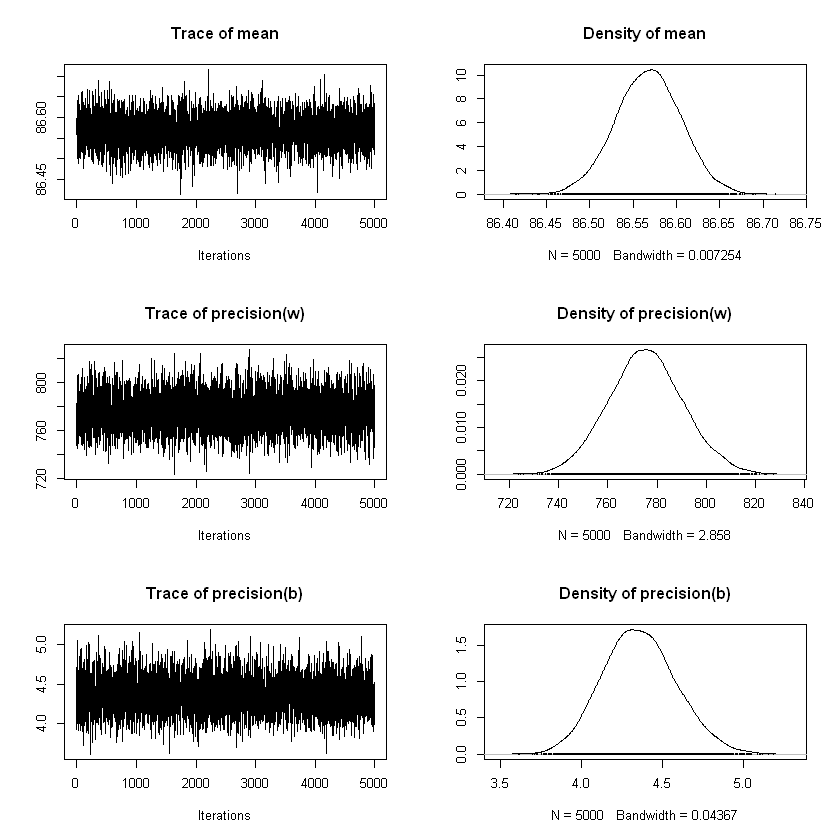

In [120]:
plot(as.mcmc(fit2$params))

In [121]:
apply(fit2$params, 2, mean)
apply(fit2$params, 2, sd)

mean(1/sqrt(fit2$params[, 2]))
sd(1/sqrt(fit2$params[, 2]))

mean(1/sqrt(fit2$params[, 3]))
sd(1/sqrt(fit2$params[, 3]))

mean precision(w) precision(b) 
   86.567621   775.566262     4.359791

mean precision(w) precision(b) 
  0.03758822  14.98447466   0.22628542

[1] 0.03591297

[1] 0.0003468655

[1] 0.4794075

[1] 0.01242398

In [122]:
theta_hat <- apply(fit2$theta, 2, mean)

In [123]:
theta_hat

Aglianico del Vulture 
                                          87.76524 
                                            Alcamo 
                                          86.75136 
                                        Alto Adige 
                                          87.43120 
                           Alto Adige Valle Isarco 
                                          87.71453 
                          Asolo Prosecco Superiore 
                                          87.11197 
                                              Asti 
                                          84.66914 
                                    Barbera d'Alba 
                                          87.05209 
                          Barbera d'Alba Superiore 
                                          86.50146 
                                    Barbera d'Asti 
                                          87.10258 
                          Barbera d'Asti Superiore 
                                          87.29719 
                            Barbera del Monferrato 
                                          86.50061 
                                         Bardolino 
                                          87.30033 
                               Bardolino Chiaretto 
                                          86.58422 
                                Bardolino Classico 
                                          86.60073 
                                        Basilicata 
                                          85.62622 
                                       Beneventano 
                                          86.50083 
                                          Bolgheri 
                                          87.36433 
                                          Calabria 
                                          87.24952 
                                          Campania 
                                          86.17529 
                                     Campi Flegrei 
                                          87.66692 
                              Cannonau di Sardegna 
                                          87.14370 
                              Carignano del Sulcis 
                                          87.99969 
                                        Carmignano 
                                          87.71409 
                                  Castel del Monte 
                                          86.53064 
                               Cerasuolo d'Abruzzo 
                                          86.75171 
                             Cerasuolo di Vittoria 
                                          87.00058 
                    Cerasuolo di Vittoria Classico 
                                          88.66632 
                               Cesanese del Piglio 
                                          87.59973 
                                           Chianti 
                                          85.84881 
                                  Chianti Classico 
                                          86.95707 
                          Chianti Colli Fiorentini 
                                          85.80132 
                              Chianti Colli Senesi 
                                          86.50128 
                                Chianti Montalbano 
                                          87.20031 
                                    Chianti Rufina 
                                          87.48087 
                                 Chianti Superiore 
                                          86.27459 
                                             CirÃ² 
                                          86.71444 
                                    Colli Aprutini 
                                          85.00209 
                                   Colli Bolognesi 
                                          84.25320 
                        Colli Orientali del Friuli 
                         

In [124]:
names(theta_hat) <- colnames(fit2$theta)

In [125]:
sort(theta_hat, decreasing = TRUE)

Trento 
                                          88.92262 
                            Verdicchio di Matelica 
                                          88.77739 
                    Cerasuolo di Vittoria Classico 
                                          88.66632 
                             Vermentino di Gallura 
                                          88.57055 
                                            Lugana 
                                          88.32094 
                                          Vittoria 
                                          88.28540 
                                     Greco di Tufo 
                                          88.26761 
                  Valdobbiadene Prosecco Superiore 
                                          88.21302 
                                              Etna 
                                          88.13673 
                                   Offida Pecorino 
                                          88.00034 
                          Soave Classico Superiore 
                                          87.99990 
                              Carignano del Sulcis 
                                          87.99969 
                                          Sardinia 
                                          87.99944 
                                       Sant'Antimo 
                                          87.99890 
                                 Fiano di Avellino 
                                          87.84637 
                                          Dogliani 
                                          87.80039 
                                 Isola dei Nuraghi 
                                          87.80005 
                             Falanghina del Sannio 
                                          87.79996 
Verdicchio dei Castelli di Jesi Classico Superiore 
                                          87.77898 
                      Vino Nobile di Montepulciano 
                                          87.77798 
                             Aglianico del Vulture 
                                          87.76524 
                                   Maremma Toscana 
                                          87.75929 
          Montepulciano d'Abruzzo Colline Teramane 
                                          87.74912 
                        Falanghina del Beneventano 
                                          87.74864 
                           Alto Adige Valle Isarco 
                                          87.71453 
                                        Carmignano 
                                          87.71409 
                               Rosso di Montalcino 
                                          87.70659 
                                     Campi Flegrei 
                                          87.66692 
                                   Nebbiolo d'Alba 
                                          87.63709 
                               Cesanese del Piglio 
                                          87.59973 
                              Lambrusco di Sorbara 
                                          87.55608 
                                    Chianti Rufina 
                                          87.48087 
                             Primitivo di Manduria 
                                          87.46748 
                            Vermentino di Sardegna 
                                          87.44516 
                                        Alto Adige 
                                          87.43120 
           Valpolicella Classico Superiore Ripasso 
                                          87.39312 
                                  Montefalco Rosso 
                                          87.37550 
                                          Bolgheri 
                                          87.36433 
                                         Bardolino 
                                        

In [126]:
#getting the upper and lower bounds for the samples generated for all regions
theta_quantile_bounds <- apply(fit2$theta, 2, quantile, prob = c(0.05, .95))

In [127]:
theta_quantile_bounds

,Aglianico del Vulture,Alcamo,Alto Adige,Alto Adige Valle Isarco,Asolo Prosecco Superiore,Asti,Barbera d'Alba,Barbera d'Alba Superiore,Barbera d'Asti,Barbera d'Asti Superiore,...,Verdicchio dei Castelli di Jesi Classico Superiore,Verdicchio di Matelica,Vermentino di Gallura,Vermentino di Sardegna,Vernaccia di San Gimignano,Veronese,Vigneti delle Dolomiti,Vino Nobile di Montepulciano,Vino Spumante,Vittoria
5%,87.75090,86.72121,87.42663,87.69236,87.09232,84.64914,87.04279,86.47676,87.09508,87.28575,...,87.76907,88.75823,88.54780,87.43121,87.20438,86.97427,86.80710,87.75903,86.40765,88.26335
95%,87.77949,86.78187,87.43571,87.73634,87.13153,84.68891,87.06127,86.52598,87.11001,87.30832,...,87.78872,88.79694,88.59282,87.45921,87.21763,87.02729,86.82614,87.79741,86.45282,88.30796


In [128]:
theta_df_error <- data.frame(lower = theta_quantile_bounds[1, ], 
                       upper = theta_quantile_bounds[2, ], 
                       mean = theta_hat, 
                       region = colnames(fit2$theta))

In [129]:
theta_df_error

,lower,upper,mean,region
Aglianico del Vulture,87.75090,87.77949,87.76524,Aglianico del Vulture
Alcamo,86.72121,86.78187,86.75136,Alcamo
Alto Adige,87.42663,87.43571,87.43120,Alto Adige
Alto Adige Valle Isarco,87.69236,87.73634,87.71453,Alto Adige Valle Isarco
Asolo Prosecco Superiore,87.09232,87.13153,87.11197,Asolo Prosecco Superiore
Asti,84.64914,84.68891,84.66914,Asti
Barbera d'Alba,87.04279,87.06127,87.05209,Barbera d'Alba
Barbera d'Alba Superiore,86.47676,86.52598,86.50146,Barbera d'Alba Superiore
Barbera d'Asti,87.09508,87.11001,87.10258,Barbera d'Asti
Barbera d'Asti Superiore,87.28575,87.30832,87.29719,Barbera d'Asti Superiore


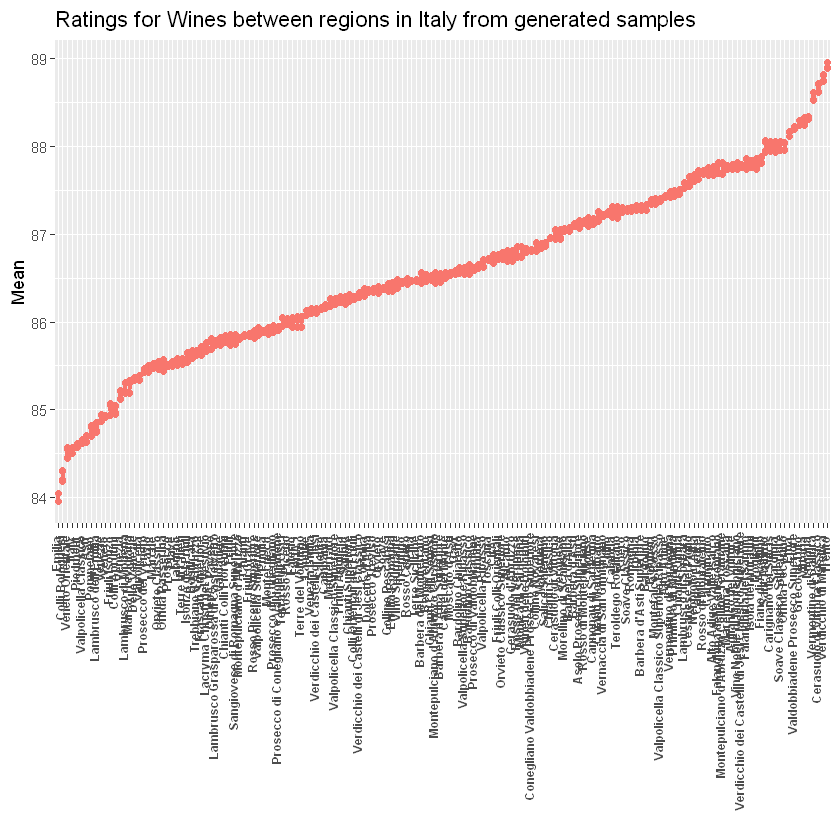

In [133]:
theta_df <- data.frame(samples = as.numeric(fit2$theta), 
                       region = rep(colnames(fit2$theta), 
                                    each = nrow(fit2$theta))) 

#reformatting the samples as per the order of the median
ggplot(theta_df) + geom_boxplot(aes(x = reorder(region, samples, median),
                   samples,fill = reorder(region, samples, median), colour = 'blue'), show.legend=FALSE) + 
  labs(title = "Ratings for Wines between regions in Italy from generated samples",
       x = "",
       y = "Mean") +
  theme_gray() +
  theme(axis.text.x = element_text(size = 7,angle = 90, face = "bold", vjust = 0.2, hjust = 0.98))

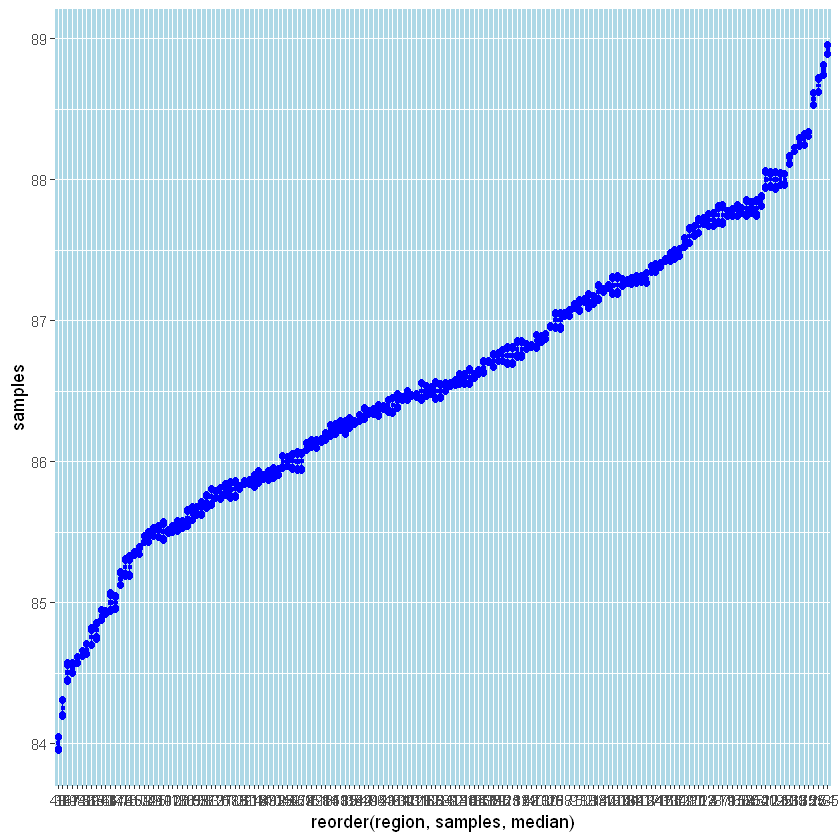

In [134]:
# reformat samples for ggplot
theta_df <- data.frame(samples = as.numeric(fit2$theta),
region = rep(1:ncol(fit2$theta), each = nrow(fit2$theta)))
ggplot(theta_df) + geom_boxplot(aes(x = reorder(region, samples, median), samples,
fill = reorder(region, samples, median)), colour='blue', show.legend=FALSE) + 
theme(panel.background = element_rect(fill = "lightblue", colour = "lightblue",size = 0.5, linetype = "solid"))

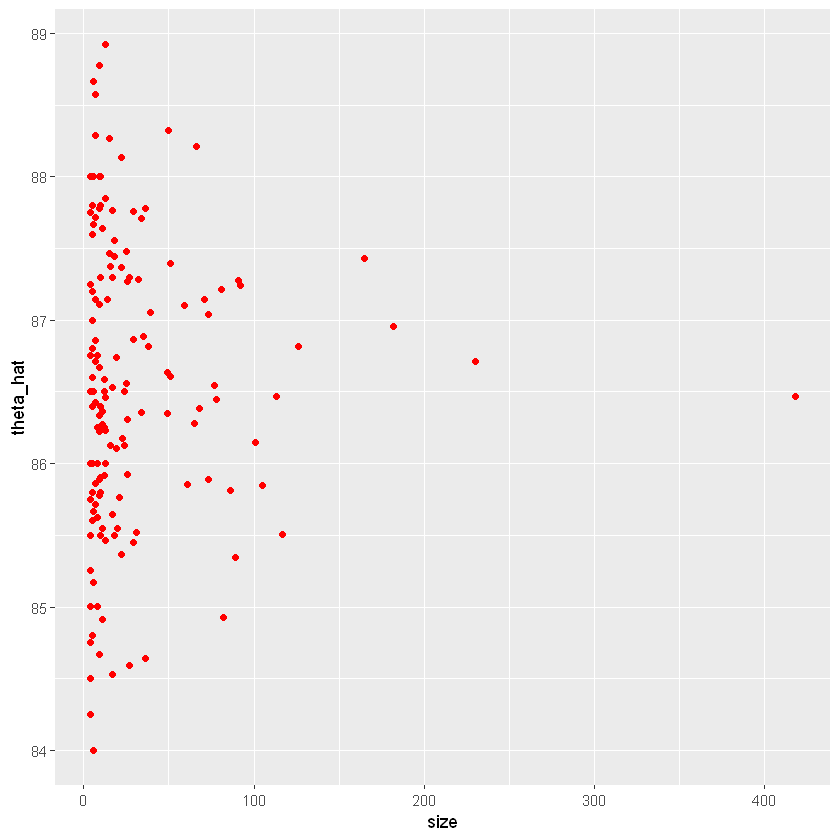

In [143]:
ggplot(data.frame(size = tapply(df_test_5$points, df_test_5$region_1, length), theta_hat = theta_hat),
aes(size, theta_hat)) + geom_point(colour='red')

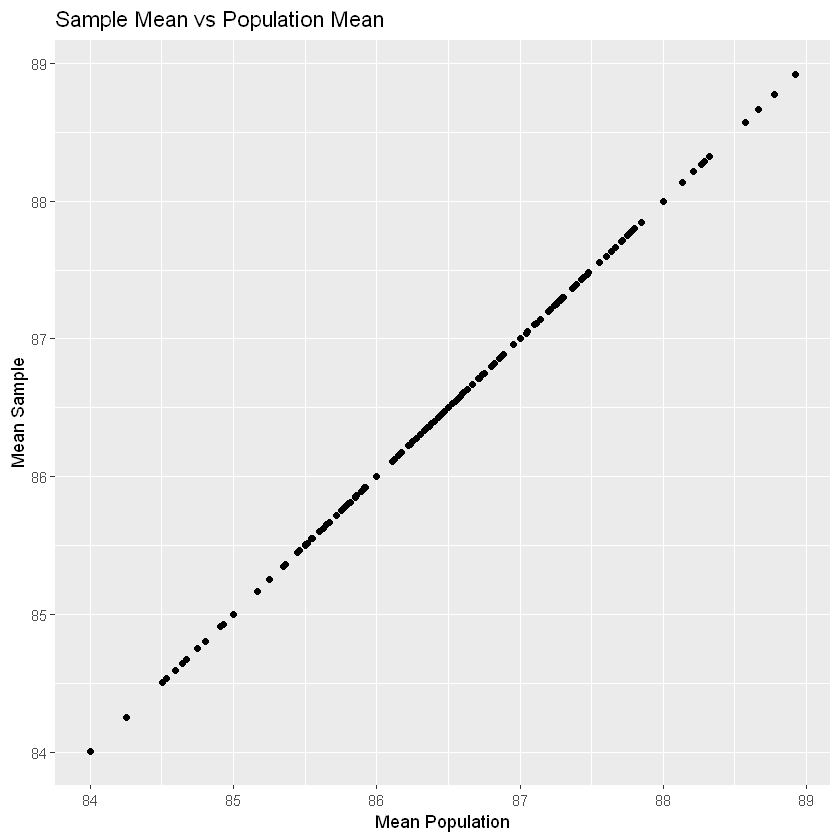

In [145]:
ggplot(data.frame(mean = tapply(df_test_5$points, df_test_5$region_1, mean), theta_hat = theta_hat), 
       aes(mean, theta_hat)) + geom_point() +
  labs(title = "Sample Mean vs Population Mean",
       x = "Mean Population",
       y = "Mean Sample") +
  theme_gray()

In [146]:
theta_hat_df <- data.frame(theta_hat)

In [147]:
head(theta_hat_df,10)

,theta_hat
Aglianico del Vulture,87.76524
Alcamo,86.75136
Alto Adige,87.43120
Alto Adige Valle Isarco,87.71453
Asolo Prosecco Superiore,87.11197
Asti,84.66914
Barbera d'Alba,87.05209
Barbera d'Alba Superiore,86.50146
Barbera d'Asti,87.10258
Barbera d'Asti Superiore,87.29719


In [148]:
theta_hat_df$region_1 <- unique(sort(df_test_5$region_1))

In [149]:
head(theta_hat_df,5)

,theta_hat,region_1
Aglianico del Vulture,87.76524,Aglianico del Vulture
Alcamo,86.75136,Alcamo
Alto Adige,87.43120,Alto Adige
Alto Adige Valle Isarco,87.71453,Alto Adige Valle Isarco
Asolo Prosecco Superiore,87.11197,Asolo Prosecco Superiore


In [150]:
# Below are the regions that produce better then average wine

In [151]:
new <- theta_hat_df[theta_hat_df$theta_hat > mean(fit2$params[, 1]), 2]

# The italian regions which produce better than average wine are

In [153]:
new

[1] Aglianico del Vulture                             
 [2] Alcamo                                            
 [3] Alto Adige                                        
 [4] Alto Adige Valle Isarco                           
 [5] Asolo Prosecco Superiore                          
 [6] Barbera d'Alba                                    
 [7] Barbera d'Asti                                    
 [8] Barbera d'Asti Superiore                          
 [9] Bardolino                                         
[10] Bardolino Chiaretto                               
[11] Bardolino Classico                                
[12] Bolgheri                                          
[13] Calabria                                          
[14] Campi Flegrei                                     
[15] Cannonau di Sardegna                              
[16] Carignano del Sulcis                              
[17] Carmignano                                        
[18] Cerasuolo d'Abruzzo                               
[19] Cerasuolo di Vittoria                             
[20] Cerasuolo di Vittoria Classico                    
[21] Cesanese del Piglio                               
[22] Chianti Classico                                  
[23] Chianti Montalbano                                
[24] Chianti Rufina                                    
[25] CirÃ²                                             
[26] Colline Novaresi                                  
[27] Collio                                            
[28] Conegliano Valdobbiadene Prosecco Superiore       
[29] Dogliani                                          
[30] Etna                                              
[31] Falanghina del Beneventano                        
[32] Falanghina del Sannio                             
[33] Fiano di Avellino                                 
[34] Friuli Colli Orientali                            
[35] Greco di Tufo                                     
[36] Irpinia                                           
[37] Isola dei Nuraghi                                 
[38] Lambrusco di Sorbara                              
[39] Lugana                                            
[40] Maremma                                           
[41] Maremma Toscana                                   
[42] Molise                                            
[43] Monica di Sardegna                                
[44] Montefalco Rosso                                  
[45] Montepulciano d'Abruzzo Colline Teramane          
[46] Morellino di Scansano                             
[47] Nebbiolo d'Alba                                   
[48] Offida Pecorino                                   
[49] Orvieto Classico Superiore                        
[50] Primitivo di Manduria                             
[51] Prosecco di Valdobbiadene                         
[52] Roero                                             
[53] Romagna                                           
[54] Rosso del Veronese                                
[55] Rosso di Montalcino                               
[56] Rosso di Montepulciano                            
[57] Salice Salentino                                  
[58] Sant'Antimo                                       
[59] Sardinia                                          
[60] Soave Classico                                    
[61] Soave Classico Superiore                          
[62] Teroldego Rotaliano                               
[63] Toscana                                           
[64] Trento                                            
[65] Umbria                                            
[66] Valdobbiadene Prosecco Superiore                  
[67] Valpolicella Classico Superiore Ripasso           
[68] Valpolicella Ripasso                              
[69] Valpolicella Superiore Ripasso                    
[70] Verdicchio dei Castelli di Jesi Classico Superiore
[71] Verdicchio di Matelica                            
[72] Vermentino di Gallur

In [152]:
summary(data.frame(new))

                       new    
 Aglianico del Vulture   : 1  
 Alcamo                  : 1  
 Alto Adige              : 1  
 Alto Adige Valle Isarco : 1  
 Asolo Prosecco Superiore: 1  
 Barbera d'Alba          : 1  
 (Other)                 :72  